In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv 
import os
import numpy as np
import multiprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

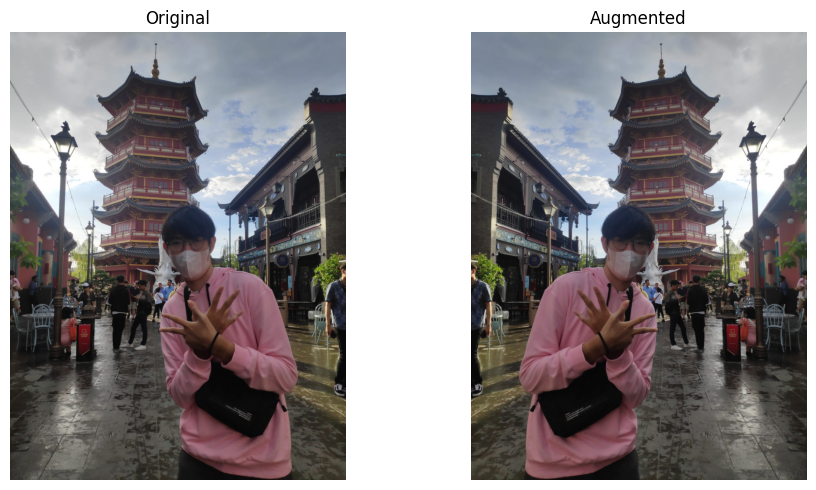

In [2]:

datagen = ImageDataGenerator(
    horizontal_flip=True
)

image_path = './data/train/Pantjoran/0006 (2).jpg'
image = plt.imread(image_path)
image = np.expand_dims(image, axis=0)
image = image / 255.  

augmented_images = datagen.flow(image, batch_size=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image[0])
ax[0].set_title('Original')

augmented_image = augmented_images.next()[0]
ax[1].imshow(augmented_image)
ax[1].set_title('Augmented')

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()


In [6]:
base_dir = "./data"
TRAINING_DIR = "./data/train"
VALIDATION_DIR = "./data/val"
TEST_DIR = "./data/test"

train_ds = tf.keras.utils.image_dataset_from_directory(TRAINING_DIR)
val_ds = tf.keras.utils.image_dataset_from_directory(VALIDATION_DIR)
test_ds = tf.keras.utils.image_dataset_from_directory(TEST_DIR)

Found 447 files belonging to 3 classes.
Found 56 files belonging to 3 classes.
Found 56 files belonging to 3 classes.


In [7]:
tempat = train_ds.class_names
tempat

['Hutan Mangrove', 'La Riviera', 'Pantjoran']

In [5]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     horizontal_flip=True)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=5,
                                                      class_mode='sparse',
                                                      target_size=(300, 300))

  validation_datagen = ImageDataGenerator(rescale=1/255.0)
  
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=2,
                                                                class_mode='sparse',
                                                                target_size=(300, 300))

  return train_generator, validation_generator

In [6]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 447 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [7]:
def create_model():

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(128, (5,5), activation='relu', padding ="same", input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding ="same"),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding ="same"),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dense(3, activation="softmax")])

  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy']) 
    


  return model

In [8]:
model = create_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        51232     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

In [10]:
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/20
90/90 [==============================] - 319s 4s/step - loss: 1.0190 - accuracy: 0.4676 - val_loss: 0.9319 - val_accuracy: 0.5714
Epoch 2/20
90/90 [==============================] - 257s 3s/step - loss: 0.9217 - accuracy: 0.5794 - val_loss: 0.8578 - val_accuracy: 0.6786
Epoch 3/20
90/90 [==============================] - 257s 3s/step - loss: 0.6851 - accuracy: 0.7047 - val_loss: 0.5114 - val_accuracy: 0.7857
Epoch 4/20
90/90 [==============================] - 259s 3s/step - loss: 0.5534 - accuracy: 0.7785 - val_loss: 0.4719 - val_accuracy: 0.8393
Epoch 5/20
90/90 [==============================] - 267s 3s/step - loss: 0.4471 - accuracy: 0.8389 - val_loss: 0.4615 - val_accuracy: 0.8929
Epoch 6/20
90/90 [==============================] - 283s 3s/step - loss: 0.4150 - accuracy: 0.8389 - val_loss: 0.3473 - val_accuracy: 0.8929
Epoch 7/20
90/90 [==============================] - 292s 3s/step - loss: 0.4140 - accuracy: 0.8300 - val_loss: 0.5662 - val_accuracy: 0.7143
Epoch 8/20
90

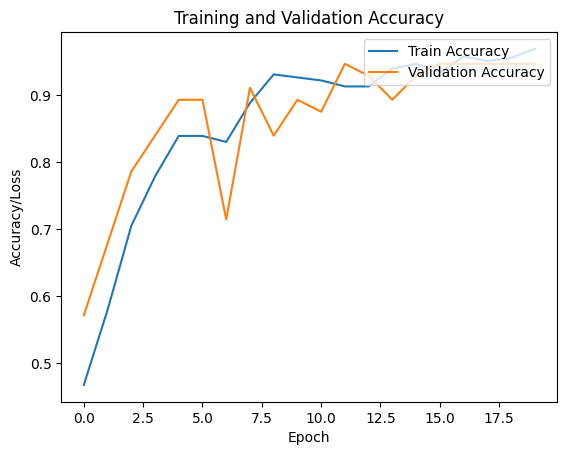

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()


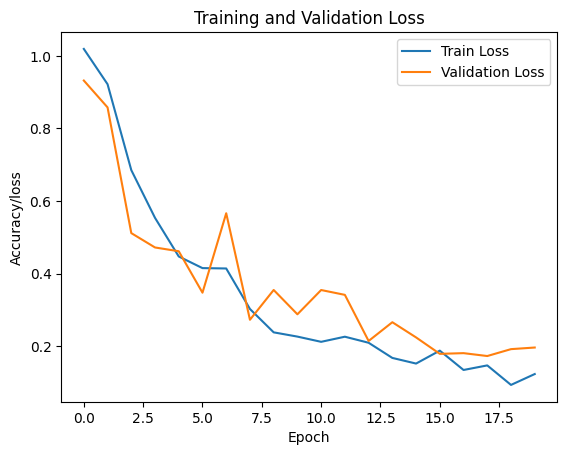

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Accuracy/loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()


In [4]:
model = tf.keras.models.load_model('./my_model90acc.h5')


1/1 [==============================] - 0s 181ms/step
This image most likely belongs to La Riviera


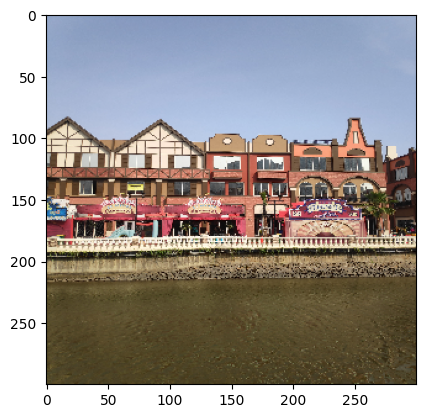

In [20]:
test_path = './data/test/La Riviera/IMG_20230521_143659.jpg'

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (300,300))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}"
    .format(tempat[np.argmax(predictions)])
)

plt.imshow(resized)
plt.show()

Found 56 images belonging to 3 classes.


C:\Users\EunHa\AppData\Local\Temp\ipykernel_12132\512285859.py:21: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data)


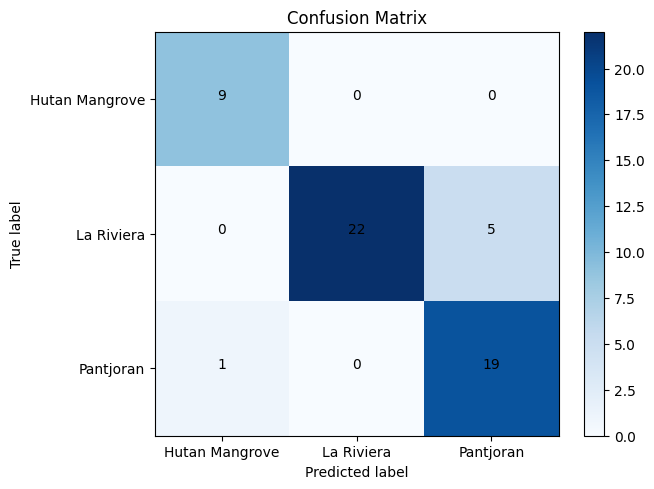

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

test_data_dir = './data/test'

test_data_generator = ImageDataGenerator(rescale=1./255)
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=2,
    class_mode='sparse',
    shuffle=False
)

num_classes = len(test_data.class_indices)

y_pred = model.predict_generator(test_data)

y_pred = np.argmax(y_pred, axis=1)

y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred)

class_labels = test_data.class_indices.keys()

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

thresh = cm_normalized.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, str(cm[i, j]),
         horizontalalignment="center",
         color="black" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
loss, accuracy = model.evaluate(test_data)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

28/28 [==============================] - 23s 433ms/step - loss: 0.3064 - accuracy: 0.8929
Test loss: 0.3064
Test accuracy: 0.8929


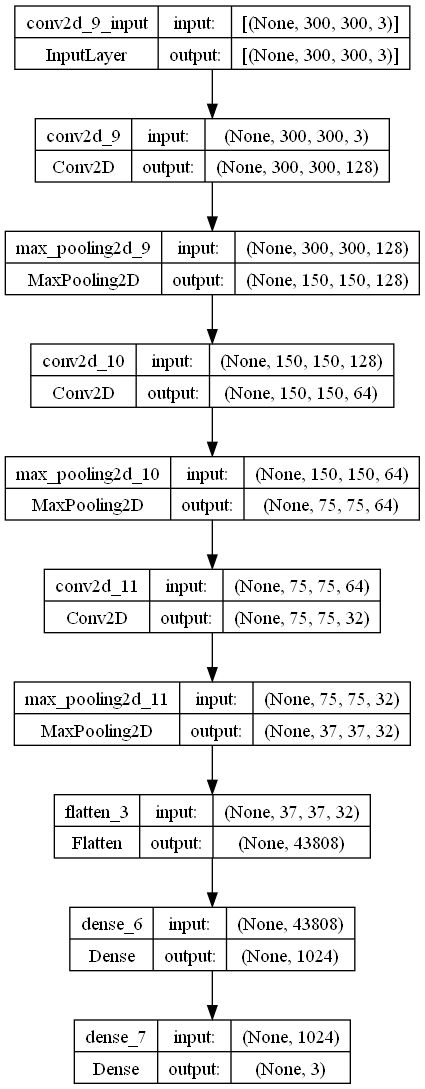

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_diagram.png', show_shapes=True)

In [18]:
saved_model_path = "./my_model90acc.h5"

model.save(saved_model_path)

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelh.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\EunHa\AppData\Local\Temp\tmpfyt1l_cv\assets


INFO:tensorflow:Assets written to: C:\Users\EunHa\AppData\Local\Temp\tmpfyt1l_cv\assets
